<a href="https://colab.research.google.com/github/ArnaudGardille/Deep-Learning-Signal/blob/main/dls_tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning et traitement du signal TP 1 

Listez les noms des étudiants (3 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom, affectation).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb 

Sophia Sirko $\\$
Arnaud Gardille

Installez les paquets nécessaires à la réalisation de ce TP
<br> 
Vous pouvez utiliser dans le notebook 
!pip install \<nom_du_paquet\>
    


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy
import librosa 
#import IPython.display as ipd
from pathlib import Path
from tqdm import tqdm

In [2]:
path = Path.cwd()

## Partie 1: Audio 

### Visualisation

 Enregistrez un fichier wav de quelques secondes de votre voix. 
  <br>
 Importez le avec librosa.open et écoutez le dans le notebook avec IPython.display.Audio


In [3]:
path_audio = path / "lalala.wav"
(rec,y) = librosa.load(path_audio)
rec,y

(array([0.        , 0.        , 0.        , ..., 0.00765991, 0.00717163,
        0.0067749 ], dtype=float32),
 22050)

In [4]:
len(rec)/y

2.972154195011338

In [5]:
rec = np.array(rec)

In [6]:
from IPython.display import Audio 
Audio(path_audio, autoplay=True)

Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez. 

Text(0.5, 0, 'temps (s)')

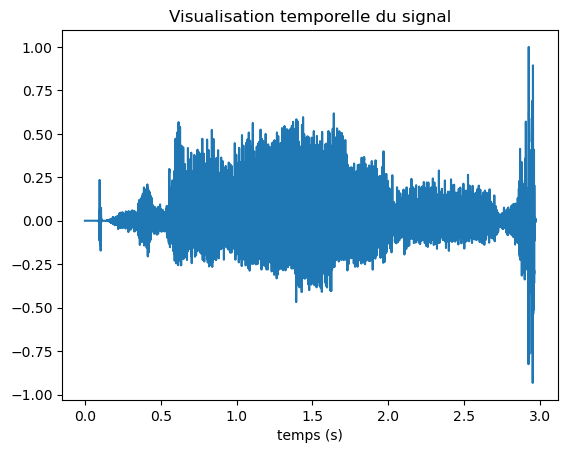

In [7]:
t = np.arange(len(rec))/y
plt.plot(t, rec)
plt.title("Visualisation temporelle du signal")
plt.xlabel("temps (s)")

In [8]:
freq,powerDen= scipy.signal.welch(rec, y, 'flattop', 1024, scaling='spectrum')

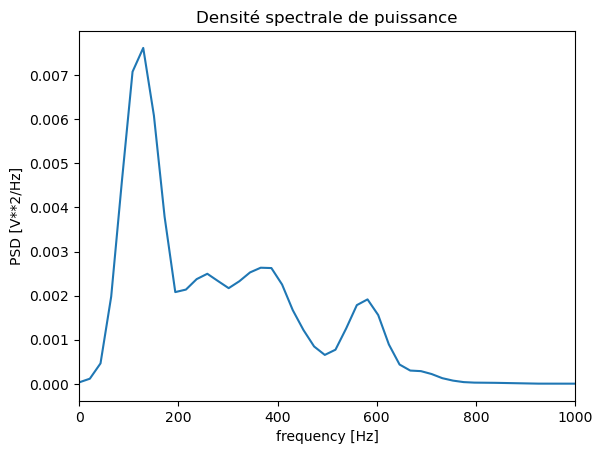

In [9]:
plt.plot(freq, powerDen)
plt.title('Densité spectrale de puissance')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim(xmin=0, xmax=1000)
plt.show()

On peut aussi l'afficher en échelle logarithmique

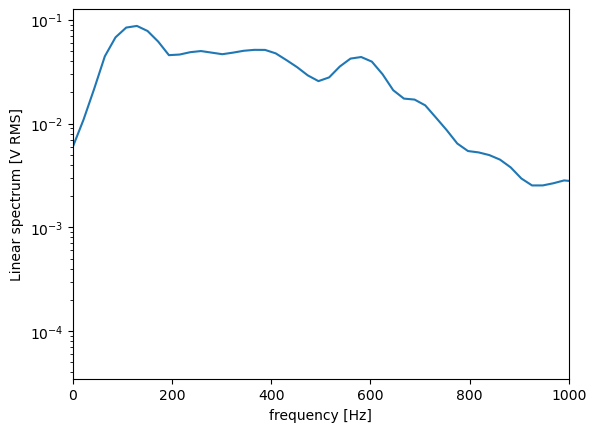

In [10]:
f, Pxx_spec = scipy.signal.welch(rec, y, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.xlim(xmin=0, xmax=1000)
plt.show()

Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.

In [11]:
pcm = plt.pcolormesh(t, f,Sxx, shading='gouraud', vmax=Sxx.max() / 10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(ymax=1000) #or yl
plt.colorbar(pcm)
plt.show()

NameError: name 'Sxx' is not defined

Le pitch de ma voix semble se situer aux alentours de 150 Hz

### Rééchantillonnage

Nous allons procéder de deux façons pour sous-échantillonner votre signal d'un facteur 2: 
- Supprimez un point sur deux: signal -> signal_reech_1
- Utilisez la fonction librosa.resample: signal -> signal_reech_2

Ecoutez les deux résultats dans le notebook et affichez le spectrogramme de (signal_reech_1 - signal) et (signal_reech_2 - signal). 

Les deux méthodes de rééchantillonnage sont elles équivalentes ? Interprétez les éventuelles différences

In [ ]:
facteur_sous_ech = 2

In [ ]:
np.repeat(rec,facteur_sous_ech).shape

(262144,)

Signal original

In [ ]:
signal_original = rec
Audio(signal_original, autoplay=True, rate=y)

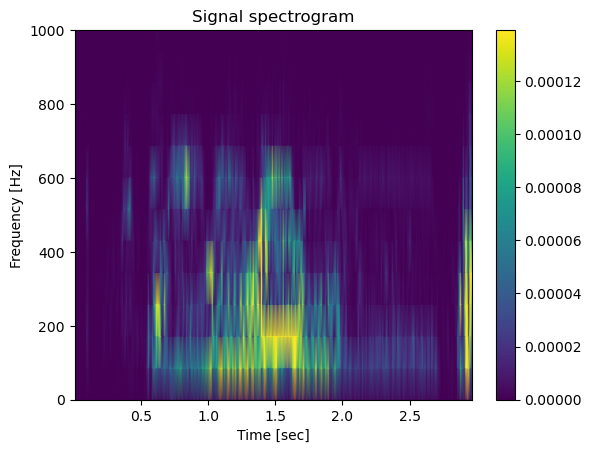

In [ ]:
f, t, Sxx = scipy.signal.spectrogram(signal_original, y)
pcm = plt.pcolormesh(t, f,Sxx, shading='gouraud', vmax=Sxx.max() / 10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(ymax=1000) #or yl
plt.title("Signal spectrogram")
plt.colorbar(pcm)
plt.show()

En ne prenant qu'une valeur sur deux du signal et en la dupliquant, la qualité devient mauvaise. Le son est métallique.

In [ ]:
signal_reech_1 = np.repeat(signal_original[::facteur_sous_ech],facteur_sous_ech)
Audio(signal_reech_1, autoplay=True, rate=y)

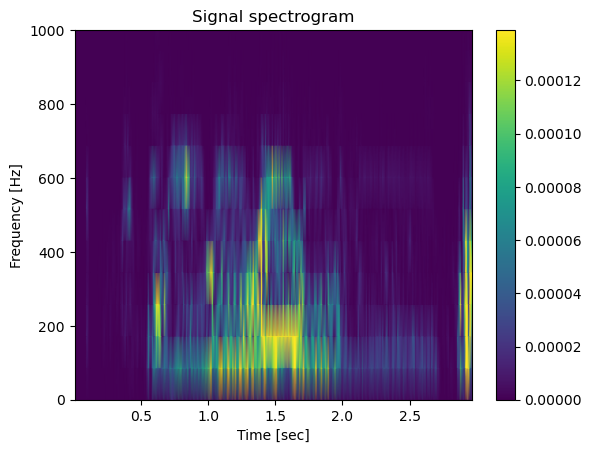

In [ ]:
f, t, Sxx = scipy.signal.spectrogram(signal_reech_1, y)
pcm = plt.pcolormesh(t, f,Sxx, shading='gouraud', vmax=Sxx.max() / 10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(ymax=1000) #or yl
plt.colorbar(pcm)
plt.title("Signal spectrogram")
plt.show()

In [ ]:
vmax = 1e-6

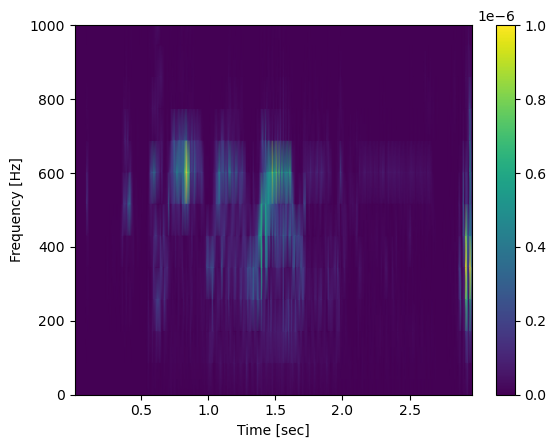

In [ ]:
f, t, Sxx = scipy.signal.spectrogram(signal_original - signal_reech_1, y)
pcm = plt.pcolormesh(t, f,Sxx, shading='gouraud', vmax=vmax)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(ymax=1000) #or yl
plt.colorbar(pcm)

plt.show()

En considérant l'échelle, on remarque que la différence entre les deux spectrogramme s'avère plus importante pour les hautes fréquences.

On va maintenant sous échantillonner puis sur-échantillonner en utilisant la méthode d'interpolation de librosa.

In [ ]:
signal_reech_2 = librosa.resample(signal_original, y, y/2)
signal_reech_2 = librosa.resample(signal_reech_2, y/2, y)
Audio(signal_reech_2, autoplay=True, rate=y)

/var/folders/bs/0f5dcrc501sf9wtpqltg62940000gn/T/ipykernel_41499/109093118.py:1: FutureWarning: Pass orig_sr=22050, target_sr=11025.0 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  signal_reech_2 = librosa.resample(signal_original, y, y/2)
/var/folders/bs/0f5dcrc501sf9wtpqltg62940000gn/T/ipykernel_41499/109093118.py:2: FutureWarning: Pass orig_sr=11025.0, target_sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  signal_reech_2 = librosa.resample(signal_reech_2, y/2, y)


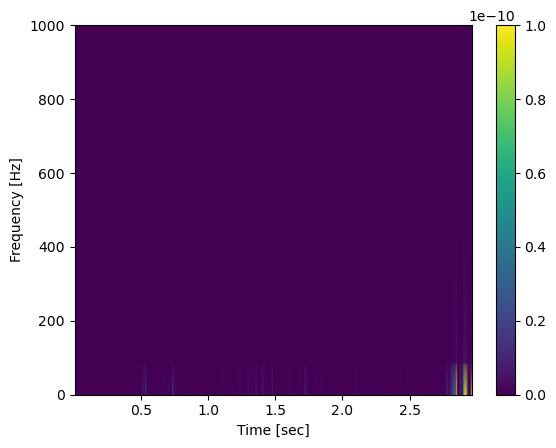

In [ ]:
f, t, Sxx = scipy.signal.spectrogram(signal_original - signal_reech_2, y)
pcm = plt.pcolormesh(t, f,Sxx, shading='gouraud', vmax=1e-10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(ymax=1000) #or yl
plt.colorbar(pcm)

plt.show()

La différence entre le signal original et signal_reech_2 est négligeable comparé à la méthode précédente. En particulier, les hautes fréquences ne sont plus aussi problématiques.

### Calcul du Pitch

Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix.

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle. 

Commentez.

In [12]:
index_max_puissance = powerDen.argmax()
pitch = freq[index_max_puissance]
print(pitch)
#le pitch est la frequence a la puissance maximale 

129.19921875


In [13]:

n_20ms = int(y/50) # number of elements of rec in 20ms (nombre de points qu'on enregistre en 20 ms)
number_20ms = int(len(rec)/y*50) # the amount of slots of 20 ms in our recording (the total lenght of the recording is 20*number_20ms miliseconds)

In [14]:
Lpitch_20ms = [] #list of pitches every 20ms

for i in range(number_20ms):
    rec_20ms = rec[i*n_20ms:(i+1)*n_20ms] # On prends les points enregistrés pendant le slot de 20 ms
    freq_20ms,powerDen_20ms= scipy.signal.welch(rec_20ms, y, 'flattop', 441, scaling='spectrum') #on calcul la frequence et la puissance du signal sur ces points
    index_max_puissance_20ms = powerDen_20ms.argmax() #On cherche l'indice de la puissance maximale
    pitch_20ms = freq_20ms[index_max_puissance_20ms] # On retrouve la fréquence correspondante à cette puissance qui est le pitch sur ces 20 ms
    Lpitch_20ms.append(pitch_20ms) #On rajoute le pitch dans notre liste de pitch

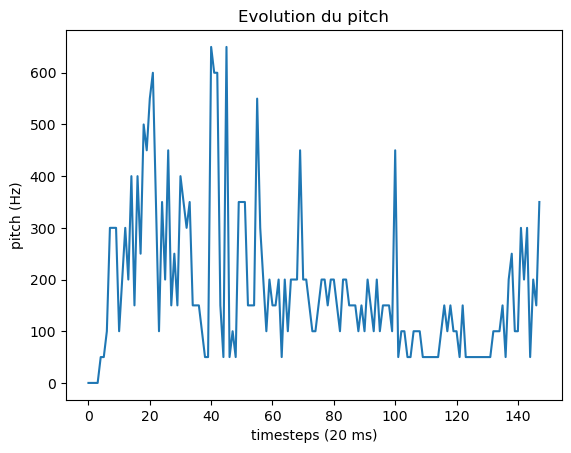

In [16]:
plt.plot(range(number_20ms), Lpitch_20ms)
plt.title('Evolution du pitch')
plt.xlabel('timesteps (20 ms)')
plt.ylabel('pitch (Hz)')
plt.show()

## Partie 2: Détection d'impulsion

Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 

Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 



In [ ]:
donnees = np.load('signaux_impulsions.npz')
signaux = donnees['data']
labels = donnees['labels']

In [ ]:
signaux.shape

(10000, 1000)

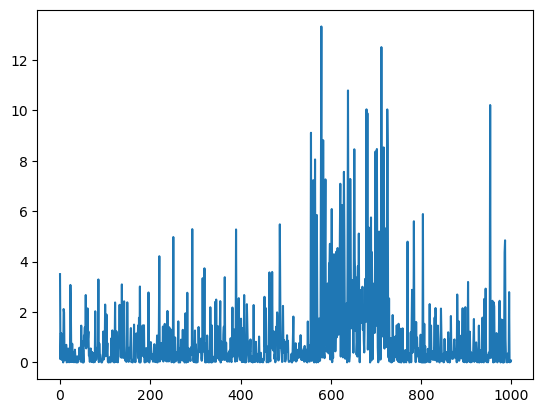

1.0

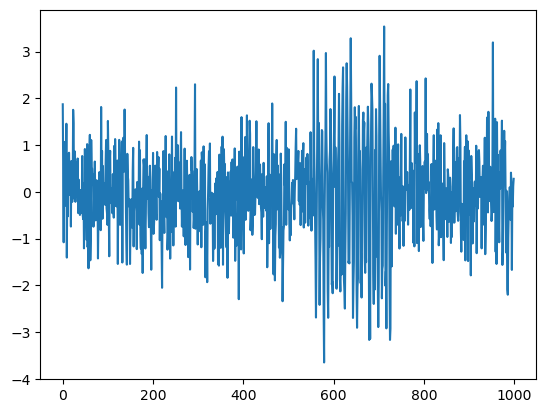

In [ ]:
n = 4
signal = signaux[n] / signaux[n].std()
plt.plot(signal**2)
plt.show()
plt.plot(signal)
labels[n]

In [ ]:
signaux[0]

array([ 2.99748051e-01, -1.21259152e-01,  2.28151208e-01,  1.04140370e+00,
        1.00579261e-01,  4.31257956e-01, -8.54848160e-01,  5.99142597e-01,
        1.71762678e-01, -6.93689300e-01, -2.55522320e-01,  4.74174939e-01,
        9.29032277e-02, -6.61717418e-01,  1.64250276e-01,  1.65634256e-01,
       -3.88129260e-01, -7.38360914e-01, -3.14336797e-01,  9.10251311e-02,
       -3.58261703e-01, -4.60912589e-01, -3.17944695e-01, -2.00348496e-01,
       -7.26022510e-01,  8.89037714e-02, -6.15809874e-01, -1.22791879e+00,
       -1.10799430e-01, -2.74619357e-02, -5.40430045e-01, -3.80219892e-01,
       -6.64738958e-01,  2.94160267e-01, -4.81730620e-02, -2.93884204e-01,
        5.97087969e-01, -5.73520407e-01, -7.24988246e-01, -5.65112628e-01,
        4.76929755e-01,  4.72606572e-01,  1.05310956e-01,  8.49153246e-01,
        6.20457172e-01,  3.87143443e-01, -1.13270977e-01,  2.05442565e-01,
        4.74786616e-01,  5.39746963e-01,  2.48866158e-01, -4.09050386e-01,
        7.27742985e-01,  

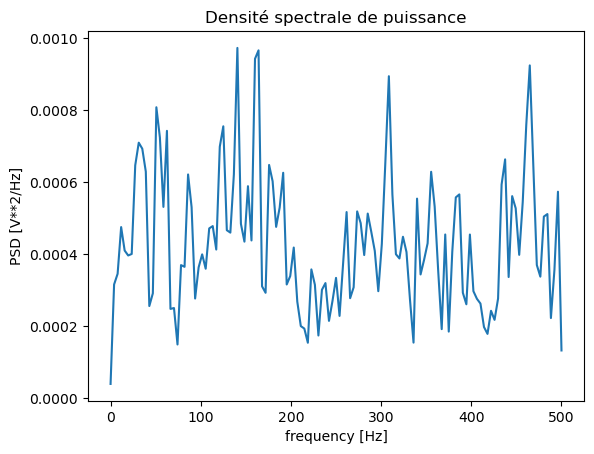

In [ ]:
#freq,powerDen= scipy.signal.welch(signaux[0], 0.001, 'flattop', 1024, scaling='spectrum')
freq,powerDen= scipy.signal.welch(signaux[0], 1000) 
plt.plot(freq, powerDen)
plt.title('Densité spectrale de puissance')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#plt.xlim(xmin=0, xmax=1000)
plt.show()

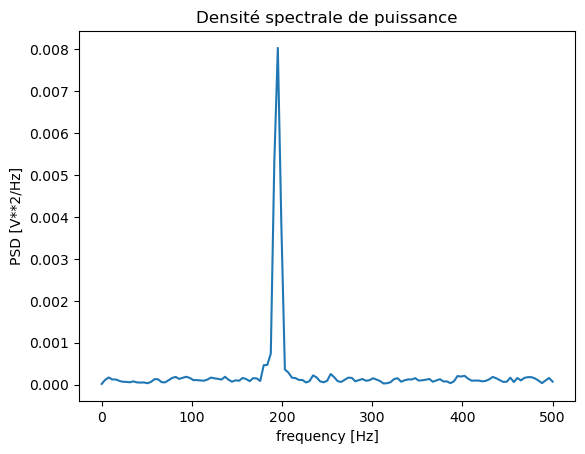

In [ ]:
#freq,powerDen= freq,powerDen= scipy.signal.welch(signaux[-1]/signaux[-1].std(), 0.001, 'flattop', 1024, scaling='spectrum')
freq,powerDen= scipy.signal.welch(signaux[-1], 1000) 
plt.plot(freq, powerDen)
plt.title('Densité spectrale de puissance')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#plt.xlim(xmin=0, xmax=1000)
plt.show()

Proposez une méthode (simple) pour décider si un signal contient une impulsion ou non. Cette méthode fera intervenir un seuil. 
Utilisez votre méthode sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 

Nous allons comparer vos résultats aux résultats idéaux consignés dans le tableau labels. 

Calculez le nombre de signaux pour lesquels votre résultat concorde avec le résultat idéal. 



On calcule la densité spectrale de puissance. 

In [ ]:
seuil = 0.02
np.any(powerDen > seuil)

False

In [ ]:
def pred_signal(signal, seuil = 0.002):
    freq,powerDen= scipy.signal.welch(signal, 1000) #, 'flattop', 1024, scaling='spectrum')
    #print(np.sum(powerDen > seuil))
    #print(powerDen > seuil)
    return np.any(powerDen > seuil)

pred_signal(signaux[0])

False

In [ ]:
pred_signal(signaux[-1])

True

In [ ]:
np.sum(labels)

5004.0

In [ ]:
labels.astype(bool)

array([False, False, False, ..., False,  True,  True])

La distribution des labels est équilibrée.

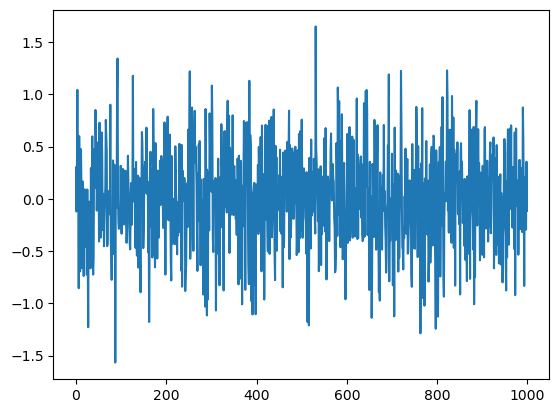

In [ ]:
plt.plot(signaux[0])

In [ ]:
nb_erreurs = 0
False_pos = 0
False_neg = 0
for k in range(10000):
    pred = pred_signal(signaux[k], 0.003)
    if pred and not labels[k]:
        False_pos += 1
    if not pred and labels[k]:
        False_neg += 1
    #print(pred_signal(signaux[k], 15.0), labels[k])
nb_erreurs = False_pos + False_neg
print(False_pos, False_neg)
print(nb_erreurs)

13 1073
1086


En ajustant les seuil, on arrive a 20% d'erreurs

On peut aussi simplifier la méthode en fixant $seuil_n = 1$ 

In [ ]:
nb_erreurs = 0
False_pos = 0
False_neg = 0
for k in range(10000):
    pred = pred_signal(signaux[k]) 
    if pred and not labels[k]:
        False_pos += 1
    if not pred and labels[k]:
        False_neg += 1
    #print(pred_signal(signaux[k], 15.0), labels[k])
nb_erreurs = False_pos + False_neg
print(False_pos, False_neg)
print(nb_erreurs)

460 914
1374


En ajustant le seuil, on arrive a 27% d'erreurs

La précision est définie comme (le nombre de signaux décidés positifs par votre méthode et qui sont effectivement positifs)/(le nombre de signaux décidés positifs par votre méthode)

et le rappel comme (le nombre de signaux décidés positifs par votre méthode et qui sont effectivement positifs)/(le nombre de signaux réellement positifs)

Faites varier le seuil et enregistrez pour ses différentes valeurs la précision et le rappel de votre méthode. Affichez dans le plan (précision , rappel) les points de fonctionnement de votre méthode. Commentez le résultat. 

In [ ]:
def compute_prec_recall(signaux, seuil= 0.003):
    nb_erreurs = 0
    False_pos = 0
    False_neg = 0
    True_pos = 0
    True_neg = 0
    for k in range(10000):
        pred = pred_signal(signaux[k], seuil)
        if pred:
            if not labels[k]:
                False_pos += 1
            else:
                True_pos += 1
        if not pred:
            if labels[k]:
                False_neg += 1
            else:
                True_neg += 1
        #print(pred_signal(signaux[k], 15.0), labels[k])
    nb_erreurs = False_pos + False_neg

    precision = 0
    recall = 0

    precision = True_pos/(True_pos + False_pos)
    rappel = True_pos/(True_pos + False_neg)
    #print("precision: ", precision)
    #print("rappel: ", rappel)
    return precision, rappel

In [ ]:
seuils = np.linspace(0.0, 0.01, 20)
precisions, rappels = [], []
for seuil in tqdm(seuils):
    precision, rappel = compute_prec_recall(signaux, seuil)
    precisions.append(precision)
    rappels.append(rappel)

100%|██████████| 20/20 [00:21<00:00,  1.06s/it]
